# 課題1

HTCHHCTHHTTHCTTTCHHHTTCCTHTCHHTTCHCTCTTTTTCHCCHTTTCCHTCTHTHTHHTHHHTCCHHHHTTCHHCHCCTCHHTHHCHHCTTTHHHTTTHTHHHTTCHCTHCHTCHTHCHTHTHHHTHCHHCTTHCHCTHHTTHHTHHCCCHHTCHHHHTHHHCCTTHHCHHTCTCCHCCHCHCTHHCCTCTCHTHC
Counter({'H': 84, 'T': 63, 'C': 53})


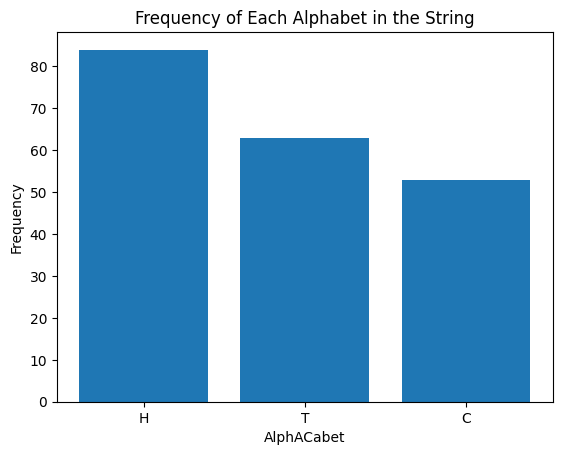

In [3]:
import random
from collections import Counter
import matplotlib.pyplot as plt

random.seed(123)

target_str = ''.join(chr(random.randint(65,90)) for i in range(200))

plt.bar(*zip(*Counter(target_str).items()))

plt.title('Frequency of Each Alphabet in the String')
plt.xlabel('AlphACabet')
plt.ylabel('Frequency')

print(target_str)
print(Counter(target_str))

# 課題2

OK.
Generated String : HCHCTCHCCTTTCTTTCCTTTTTCTTTTTTTCTTCTTHCHTCTTTHHCCCCTTCCCTTHTTHHCCCHCHHTTCTCTTTTTCTTTTTCCCTHHCCCCTTTTTTTTTTCCTCCHTTHHCCTTTCHCHTCTTTTCCCTTTTTCHHCCTTTTTHCHCTTTHCCTTCTTTTTCCCCHHCTTTCCCCHCTTCTTTTTTTTTHCCHCHCCTTCCHHCCHCCTTCCCTHCCCCCTTTCCTCTHCCCCCTTCCCTTHCHCHCTTTTCTCTCTTTCTTHCHCCTTHTCCCCCCTTTTCCHCTHHCCTTTCTTTTTCTTTCTCCCCCCTHCCTCTTTTCTCHHHTTTCTTTTTCTTTTTTCTTTTCHCTTTHCCCHHCTCCHHCCCCHCTTTTCHCTTTTCHCCTTTTTTTTTTCHCTTCTTTTTTTCTTTTTTCCTTTTTHHHHCCHCCHTTTTTCHTTTHHCCCCTTCTTTTTTCCCTTHHCTTTTTTCHHCHHCHCTCHTCTCTHHHHCCTTCCCCHCTTHCTTTCTTHCHTTTTTCHCTCCTTTTTTTCTTTTTTTTTCCCCHCTTTCCTTTCHHCTTTTCHHHCTTTTTTHCCCCTTTTCHCTCCHC


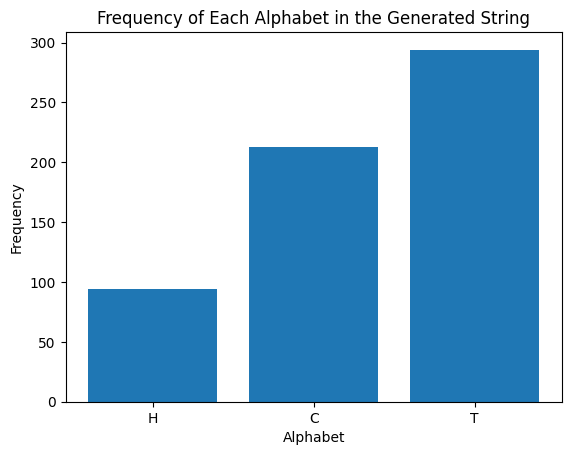

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

LENGTH = 100

transition_matrix = {
    'H': {'H': 0.3, 'T': 0.1, 'C': 0.6},
    'T': {'H': 0.1, 'T': 0.7, 'C': 0.2},
    'C': {'H': 0.2, 'T': 0.4, 'C': 0.4}
}

if sum(sum(transition_matrix[s].values()) for s in transition_matrix) != 3: print("Transition matrix is wrong.")
else: print("OK.")

state = 'H'
sequence = [state]

for i in range(LENGTH):
    next_state = np.random.choice(
        ['H', 'T', 'C'],
        p=[
            transition_matrix[state]['H'],
            transition_matrix[state]['T'],
            transition_matrix[state]['C']
        ])
    
    sequence.append(next_state)
    state = next_state

generated_str = ''.join(sequence)

print(f'Generated String : {generated_str}')

plt.bar(*zip(*Counter(generated_str).items()))

plt.title('Frequency of Each Alphabet in the Generated String')
plt.xlabel('Alphabet')
plt.ylabel('Frequency')

plt.show()

# 課題3

FileNotFoundError: [Errno 2] No such file or directory

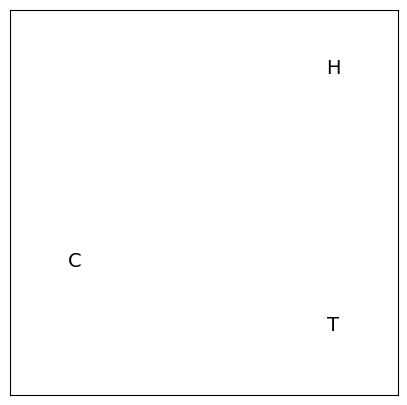

In [16]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import Video

fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlim=(0, 3), ylim=(0, 3), xticks=[], yticks=[])
line, = ax.plot([], [], 'go', markersize=60)
locations = {'H': (2.5, 2.5), 'C': (0.5, 1.0), 'T': (2.5, 0.5)}
for x, y, text in [(2.5, 2.5, 'H'), (0.5, 1.0, 'C'), (2.5, 0.5, 'T')]:
    ax.text(x, y, text, size=14, ha='center')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x, y = locations[generated_str[i]]
    line.set_data([x], [y])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(generated_str), interval=200, repeat=False)

# ffmpeg ライターの指定
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=5, metadata=dict(artist='Me'), bitrate=1800)

anim.save('kadai3.mp4', writer=writer)
Video('kadai3.mp4')


# 課題4

In [18]:
print(generated_str)

print('-'*50)

def min_priority_queue(S):
    return sorted(S.items(), key=lambda x: x[1], reverse=True)

def extract_min(Q):
    return Q.pop()

def insert(Q, z):
    Q.append(z)

def huffman(S):
    Q = min_priority_queue(S)
    tree = []
    
    print("各文字の出現頻度:\n", Q, "\n\nハフマン木の構成:")
    while len(Q) > 1:
        print(Q)
        left, right = extract_min(Q), extract_min(Q)
        z = (left[0] + right[0], left[1] + right[1])
        insert(Q, z)
        tree += [[left, "0", left[0] + right[0]], [right, "1", left[0] + right[0]]]
        Q = min_priority_queue(dict(Q))
    
    tree.append([extract_min(Q), "", "top"])
    return tree

def print_result(tree, sl):
    result = []
    for node in tree:
        now, num = node[0][0], node[1]
        i = 0
        while tree[i][2] != 'top':
            if node[2] == tree[i][0][0]:
                num = tree[i][1] + num
                node, i = tree[i], 0
            else:
                i += 1
        if now in sl:
            result.append([now, num])
    return sorted(result)

def divide_string(S):
    return dict(Counter(S))
sl = divide_string(generated_str)
huffman_tree = huffman(sl)

print("\n符号を割り当てる")
total_length = total_length_2 = 0

for b in print_result(huffman_tree, sl):
    symbol, code = b[0], b[1]
    freq = sl[symbol]
    code_len = len(code)
    total_length += code_len * freq
    total_length_2 += freq * 8
    print(f"{symbol}: {code}: 符号長: {code_len}: 出現回数: {freq}: 総ビット長: {code_len * freq}")

print(f"\n各文字に８ビット割り当てた時の総ビット数: {total_length_2}")
print(f"ハフマン符号を使った場合の総ビット数: {total_length}")
print(f"\n圧縮率: {100 - (total_length / total_length_2 * 100):.2f}% (削減)")

HCTTTHCTTTTTHHCCCTTTTTTTTTTHHHCCHCCHCHHCCTCTTTTCHCTTTTTHCTTCCHCTTTTTTCCTCCCCTTTTCHCCTTTTHCCHCHHCTTTHC
--------------------------------------------------
各文字の出現頻度:
 [('T', 48), ('C', 33), ('H', 20)] 

ハフマン木の構成:
[('T', 48), ('C', 33), ('H', 20)]
[('HC', 53), ('T', 48)]

符号を割り当てる
C: 11: 符号長: 2: 出現回数: 33: 総ビット長: 66
H: 10: 符号長: 2: 出現回数: 20: 総ビット長: 40
T: 0: 符号長: 1: 出現回数: 48: 総ビット長: 48

各文字に８ビット割り当てた時の総ビット数: 808
ハフマン符号を使った場合の総ビット数: 154

圧縮率: 80.94% (削減)


In [23]:
print(ord('A'))
print(chr(60))

65
<
